# Agriculture Project

# Train data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
df=pd.read_csv(r"C:\Users\Admin\Downloads\train_agriculture.csv")

In [4]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [5]:
#checking columns
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
#checking shape
df.shape

(4599, 10)

In [7]:
#checking data type 
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
#checking missing values
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
df.dropna(axis=1,inplace=True)

In [11]:
df.isnull().values.any()

False

In [12]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,1,0
1,F00000003,209,1,0,1,0,0,2,1
2,F00000004,257,1,0,1,0,0,2,1
3,F00000005,257,1,1,1,0,0,2,1
4,F00000006,342,1,0,1,0,0,2,1


## explore data variable

In [13]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ' : '+str(df[column].unique()))
        print(df[column].value_counts())
        print('************************************')
        print('\n')

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
F00000001    1
F00005417    1
F00005425    1
F00005423    1
F00005422    1
            ..
F00002704    1
F00002705    1
F00002706    1
F00002708    1
F00008083    1
Name: ID, Length: 4599, dtype: int64
************************************




In [14]:
print(df['Crop_Damage'].unique())

[0 1 2]


0-stands for that crop is alive
1-stands for that crop is damaged by other reason
2-stands for that crop is damanged by pesticides

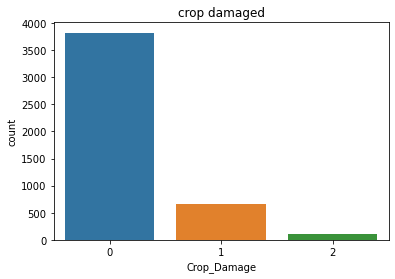

In [17]:
#countplot for crop damage
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df)
plt.title("crop damaged")
plt.show()

In [19]:
#to get value count
print(df['Crop_Damage'].value_counts())

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


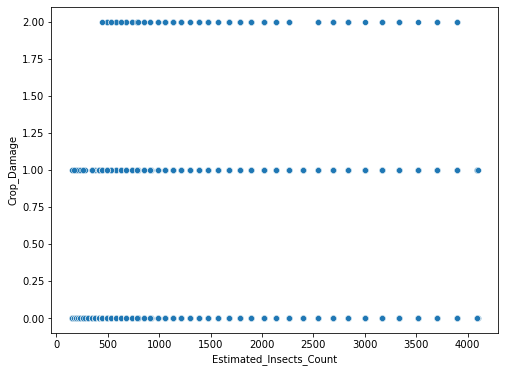

In [20]:
#plotting Crop_Damage with scatterplot

plt.figure(figsize=(8,6))
sns.scatterplot(x='Estimated_Insects_Count',y='Crop_Damage',data=df,palette='GnBu')
plt.show()

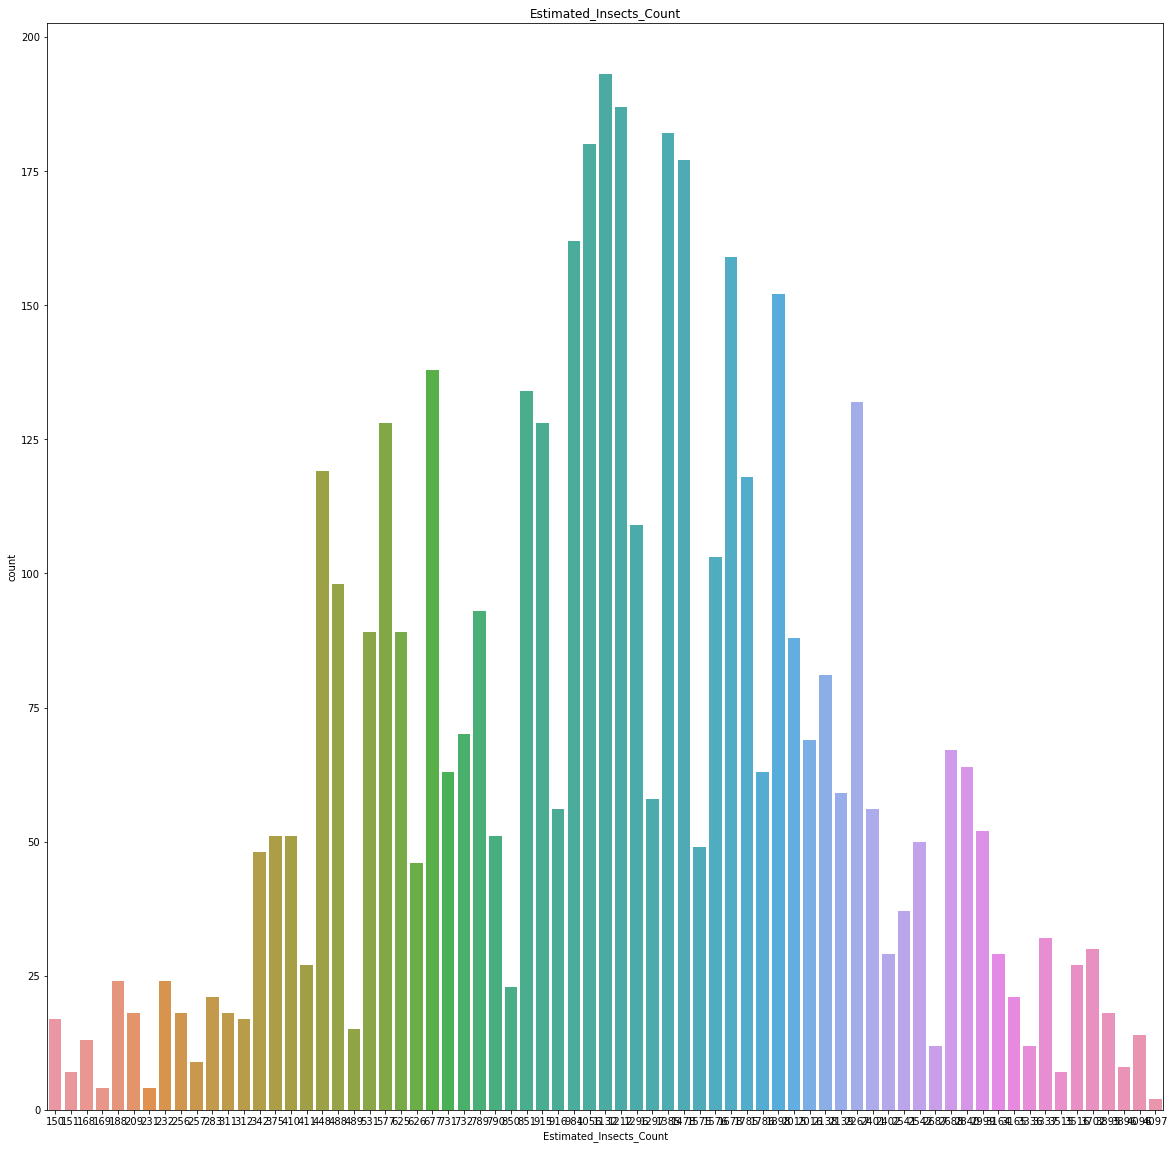

In [23]:
#countplot for Estimated_Insects_Count
plt.subplots(figsize=(20,20))
sns.countplot(x='Estimated_Insects_Count',data=df)
plt.title("Estimated_Insects_Count")
plt.show()

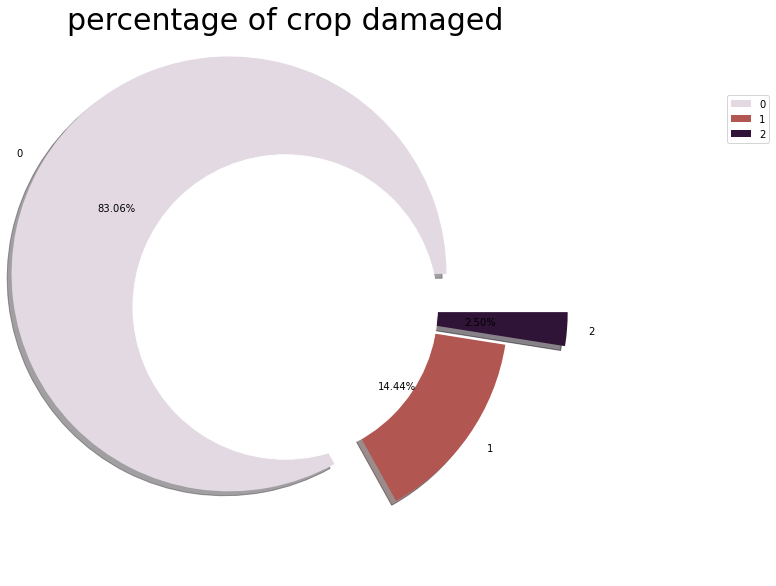

In [32]:
size=df['Crop_Damage'].value_counts()
labels=df['Crop_Damage'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))
explode=[0.3,0.03,0.3]

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,explode=explode,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of crop damaged',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

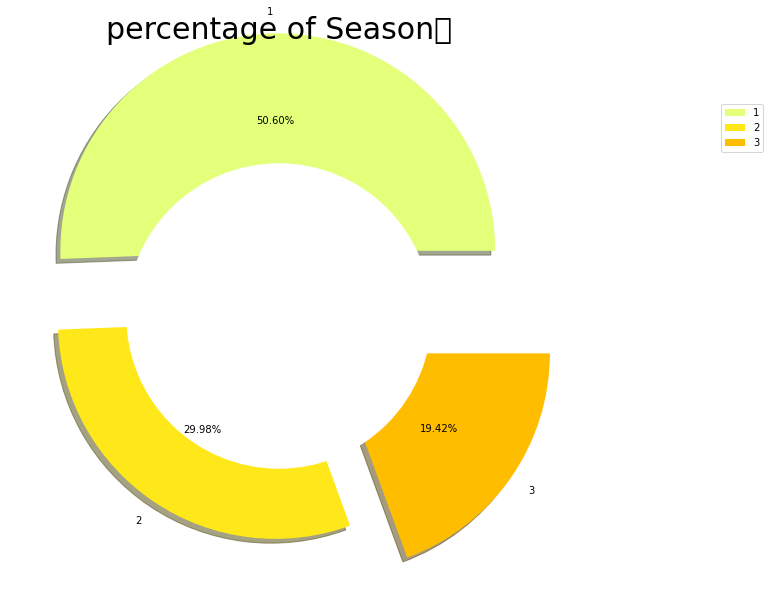

In [39]:
size=df['Season'].value_counts()
labels=df['Season'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,5))
explode=[0.3,0.03,0.3]

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,explode=explode,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Season	',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

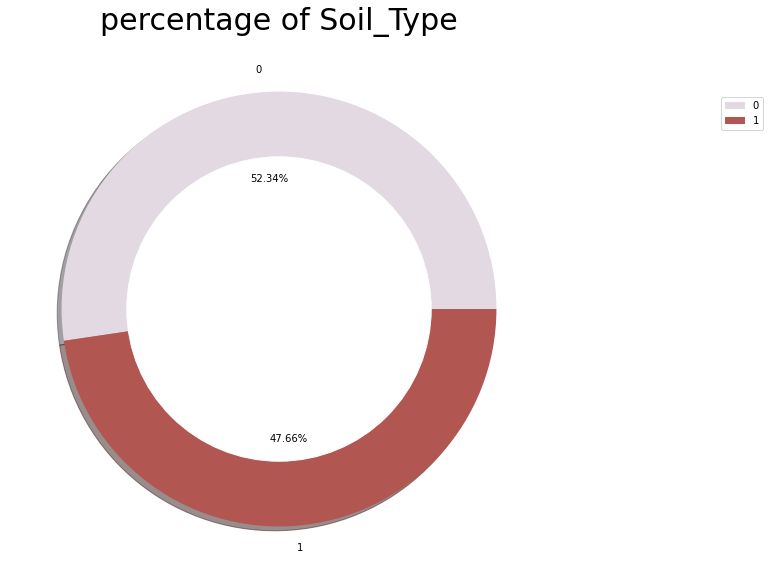

In [36]:
size=df['Soil_Type'].value_counts()
labels=df['Soil_Type'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Soil_Type',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

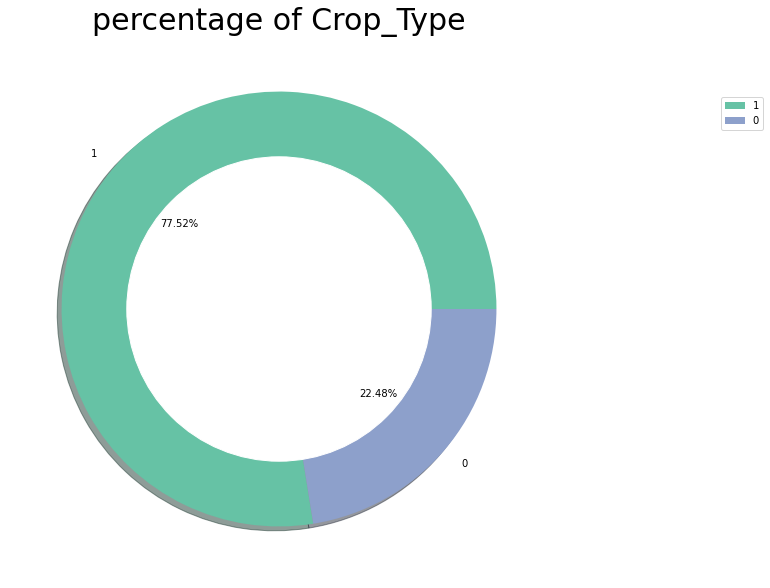

In [38]:
size=df['Crop_Type'].value_counts()
labels=df['Crop_Type'].unique()
colors=plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Crop_Type',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

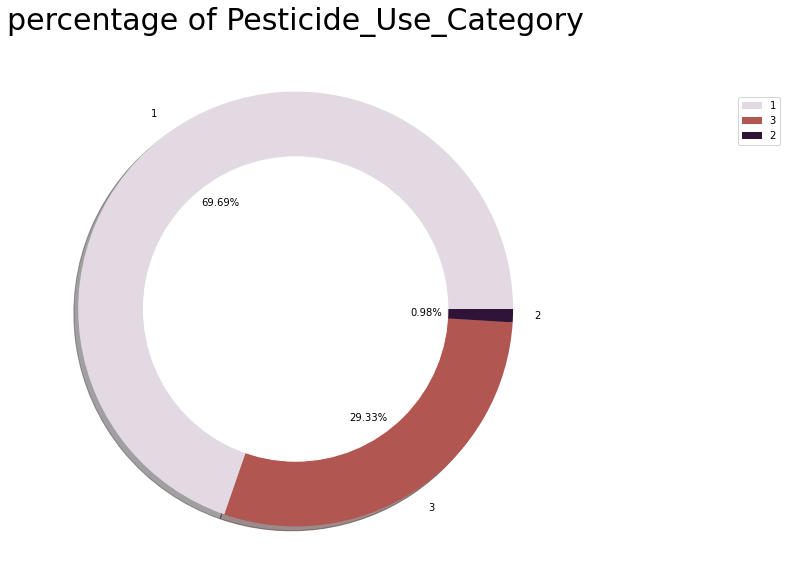

In [40]:
size=df['Pesticide_Use_Category'].value_counts()
labels=df['Pesticide_Use_Category'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Pesticide_Use_Category',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

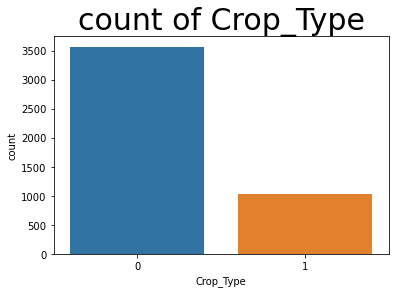

In [41]:
sns.countplot('Crop_Type',data=df)
plt.title('count of Crop_Type',fontsize=30)
plt.xlabel('Crop_Type')
plt.ylabel('count')
plt.show()

In [42]:
#to get value count
print(df['Crop_Type'].value_counts())

0    3565
1    1034
Name: Crop_Type, dtype: int64


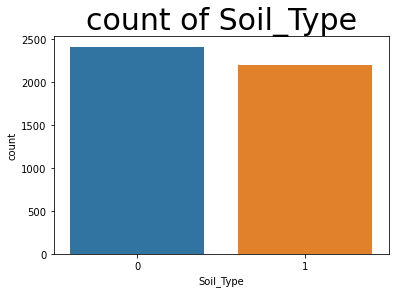

In [43]:
sns.countplot('Soil_Type',data=df)
plt.title('count of Soil_Type',fontsize=30)
plt.xlabel('Soil_Type')
plt.ylabel('count')
plt.show()

In [44]:
print(df['Soil_Type'].value_counts())

0    2407
1    2192
Name: Soil_Type, dtype: int64


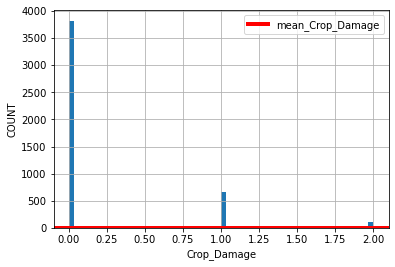

In [45]:
#plotting cost with histogram
COST=df['Crop_Damage'].hist(bins=60)
mean_val=np.mean(df['Crop_Damage'])
plt.axhline(mean_val,linewidth=4,color='r',label='mean_Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('COUNT')
plt.legend()
plt.show()

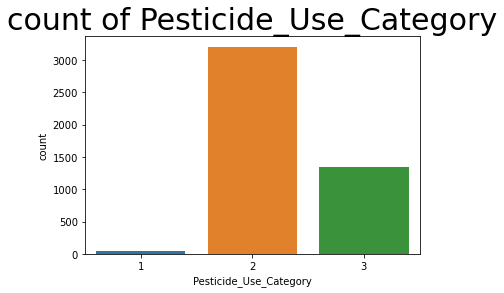

In [46]:
sns.countplot('Pesticide_Use_Category',data=df)
plt.title('count of Pesticide_Use_Category',fontsize=30)
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('count')
plt.show()

In [47]:
print(df['Pesticide_Use_Category'].value_counts())

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


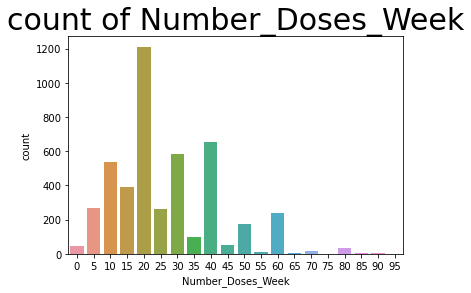

In [48]:
sns.countplot('Number_Doses_Week',data=df)
plt.title('count of Number_Doses_Week',fontsize=30)
plt.xlabel('Number_Doses_Week')
plt.ylabel('count')
plt.show()

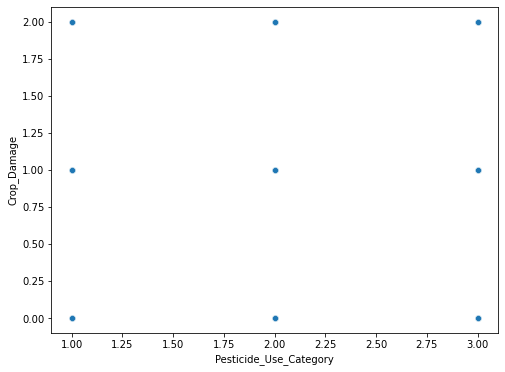

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Pesticide_Use_Category',y='Crop_Damage',data=df,palette='GnBu')
plt.show()

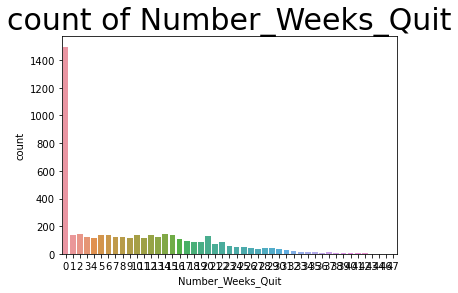

In [50]:
sns.countplot('Number_Weeks_Quit',data=df)
plt.title('count of Number_Weeks_Quit',fontsize=30)
plt.xlabel('Number_Weeks_Quit')
plt.ylabel('count')
plt.show()

In [52]:
#dropthecategoricaldata
df.drop(['ID'],axis=1,inplace=True)

by dropping ID We now have all numeric data which is now ready for testing now 
we will follow same steps as training for the test part

# Test Data

In [53]:
test_data=pd.read_excel(r"C:\Users\Admin\Downloads\test_agriculture.xlsx")

In [55]:
test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [61]:
#checking columns
test_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [63]:
#checking shape
test_data.shape

(4599, 10)

In [64]:
#checking data type 
test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [65]:
#checking missing values
test_data.isnull().values.any()

True

In [66]:
test_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [67]:
test_data.dropna(axis=1,inplace=True)

In [68]:
test_data.isnull().values.any()

False

# explore data variable

In [69]:
for column in test_data.columns:
    if test_data[column].dtypes==object:
        print(str(column)+ ' : '+str(test_data[column].unique()))
        print(test_data[column].value_counts())
        print('************************************')
        print('\n')

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
F00000001    1
F00005417    1
F00005425    1
F00005423    1
F00005422    1
            ..
F00002704    1
F00002705    1
F00002706    1
F00002708    1
F00008083    1
Name: ID, Length: 4599, dtype: int64
************************************




In [70]:
print(test_data['Crop_Damage'].unique())

[0 1 2]


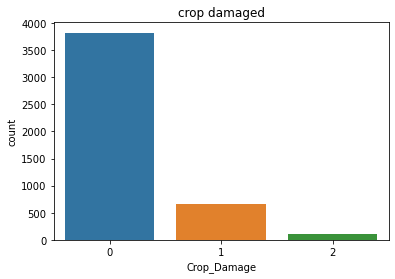

In [71]:
#countplot for crop damage
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=test_data)
plt.title("crop damaged")
plt.show()

In [72]:
#to get value count
print(test_data['Crop_Damage'].value_counts())

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


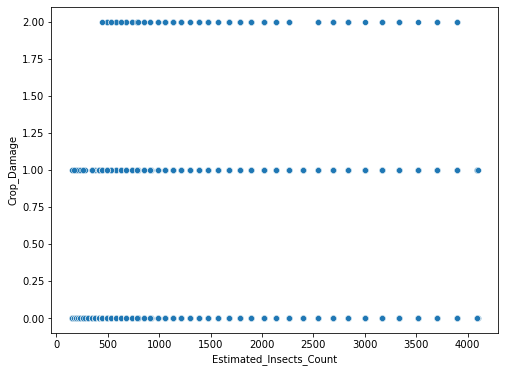

In [73]:
#plotting Crop_Damage with scatterplot

plt.figure(figsize=(8,6))
sns.scatterplot(x='Estimated_Insects_Count',y='Crop_Damage',data=test_data,palette='GnBu')
plt.show()

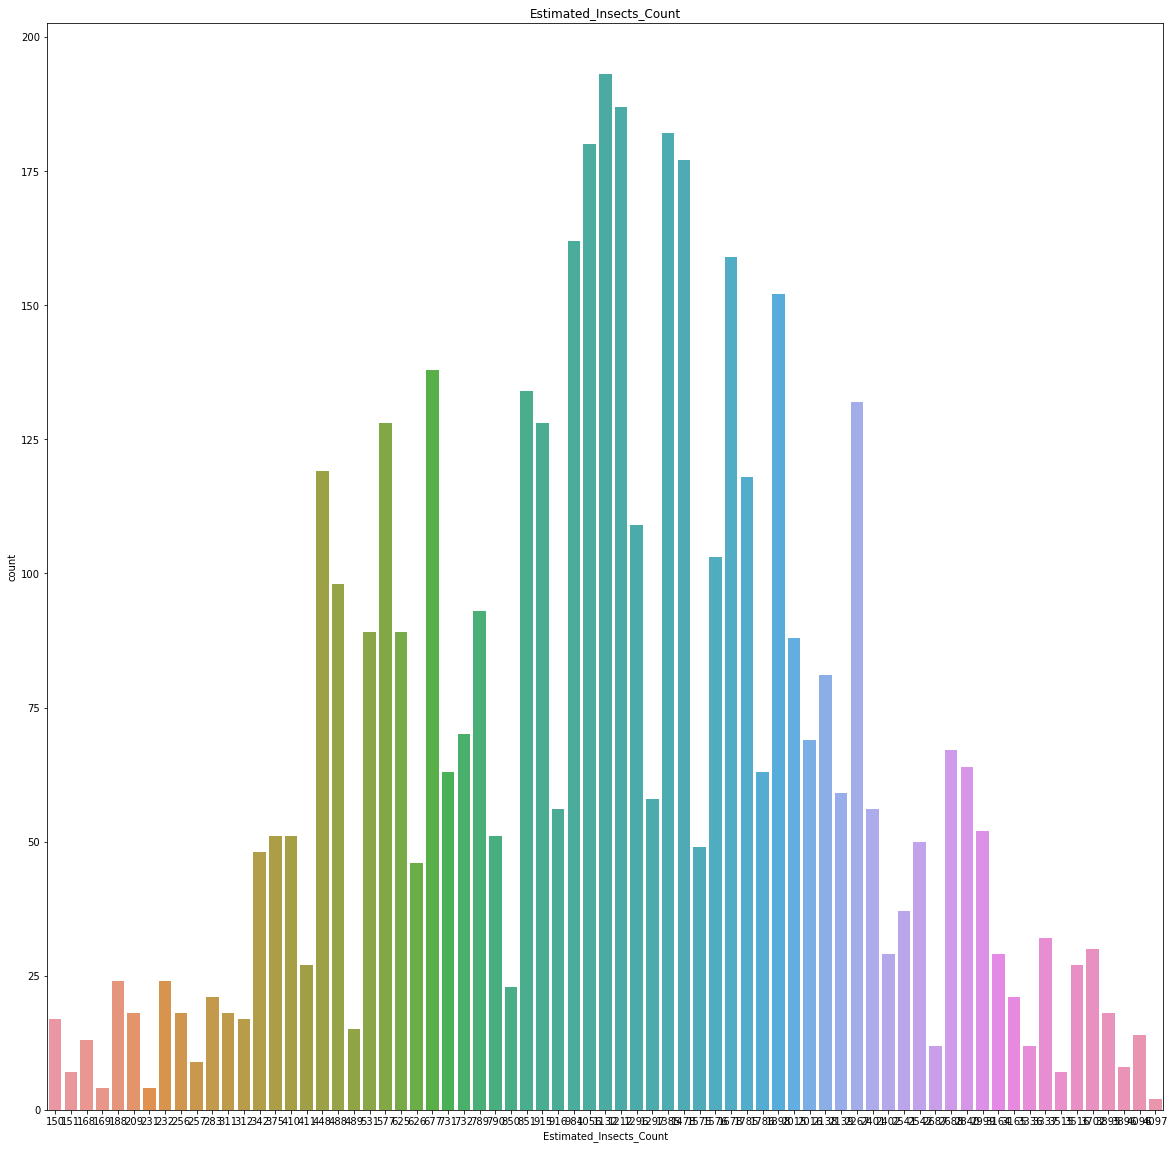

In [74]:
#countplot for Estimated_Insects_Count
plt.subplots(figsize=(20,20))
sns.countplot(x='Estimated_Insects_Count',data=test_data)
plt.title("Estimated_Insects_Count")
plt.show()

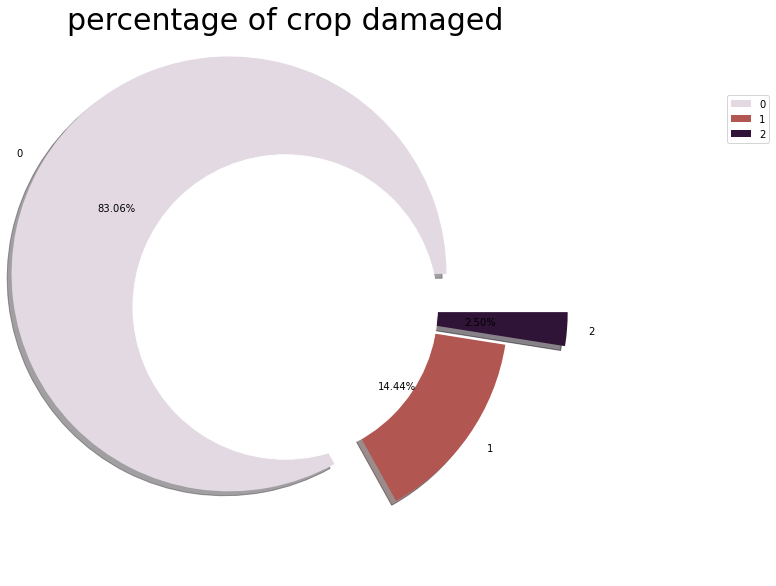

In [75]:
size=test_data['Crop_Damage'].value_counts()
labels=test_data['Crop_Damage'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))
explode=[0.3,0.03,0.3]

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,explode=explode,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of crop damaged',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

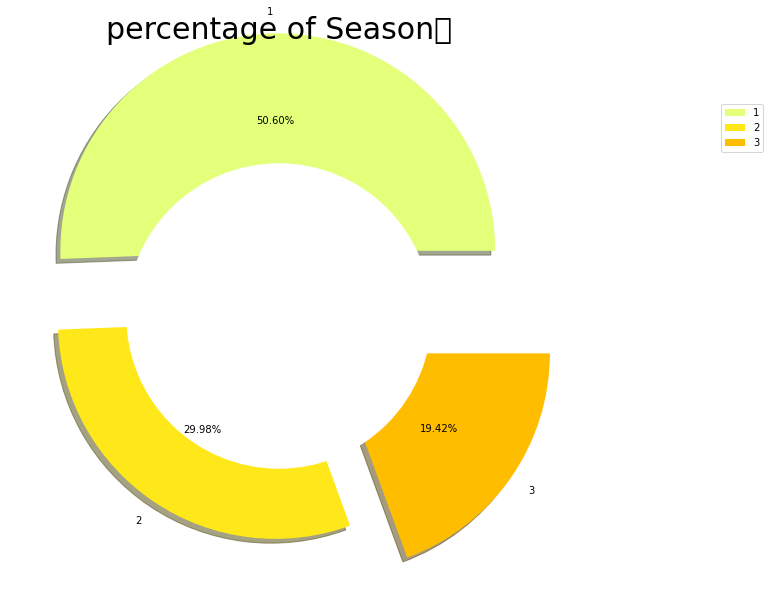

In [76]:
size=test_data['Season'].value_counts()
labels=test_data['Season'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,5))
explode=[0.3,0.03,0.3]

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,explode=explode,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Season	',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

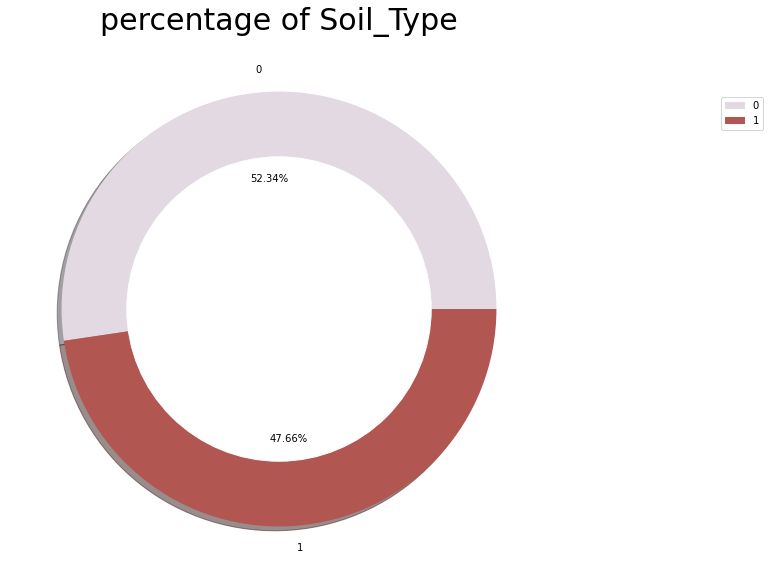

In [77]:
size=test_data['Soil_Type'].value_counts()
labels=test_data['Soil_Type'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Soil_Type',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

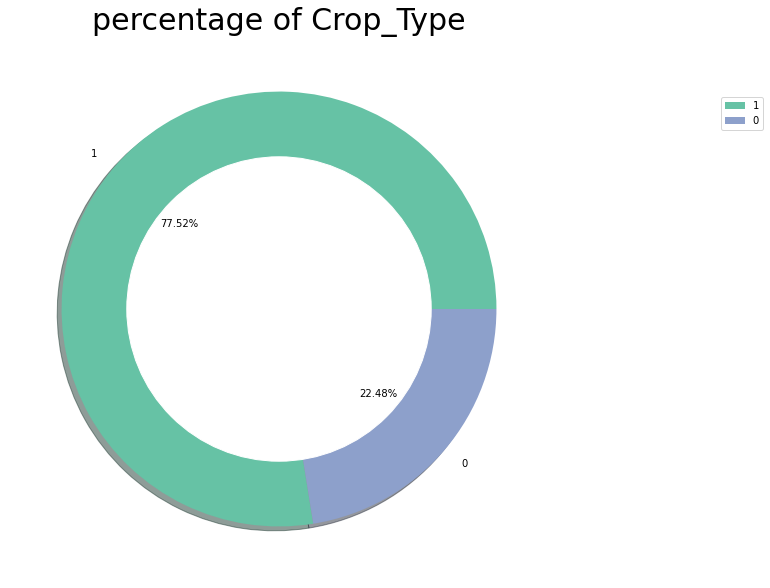

In [78]:
size=test_data['Crop_Type'].value_counts()
labels=test_data['Crop_Type'].unique()
colors=plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Crop_Type',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

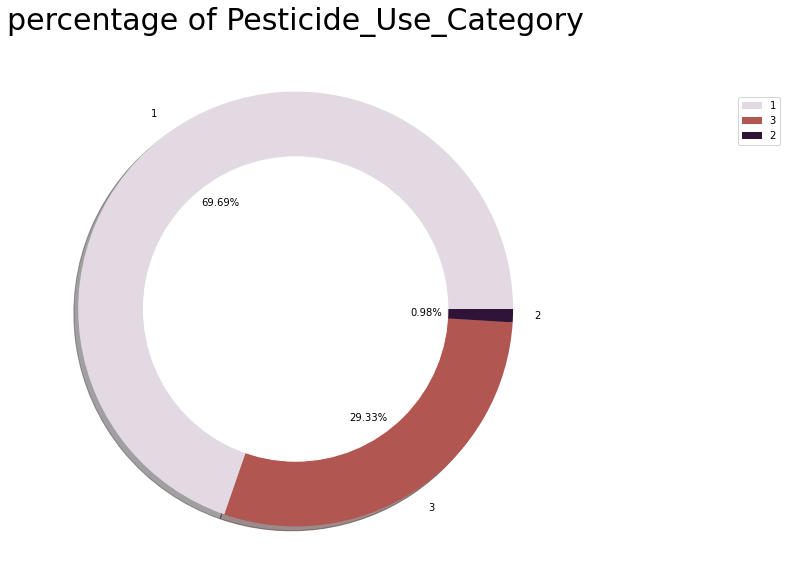

In [79]:
size=test_data['Pesticide_Use_Category'].value_counts()
labels=test_data['Pesticide_Use_Category'].unique()
colors=plt.cm.twilight_r(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle=plt.Circle((0,0),radius=0.7,color='white')
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('percentage of Pesticide_Use_Category',fontsize=30)
plt.legend(bbox_to_anchor=(0.5,.0,0.9,0.9));

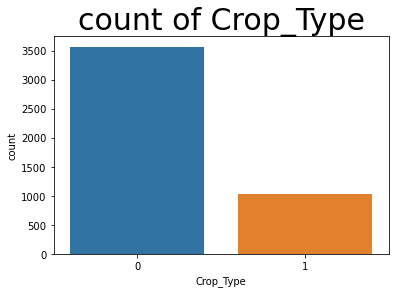

In [80]:
sns.countplot('Crop_Type',data=test_data)
plt.title('count of Crop_Type',fontsize=30)
plt.xlabel('Crop_Type')
plt.ylabel('count')
plt.show()

In [81]:
#to get value count
print(test_data['Crop_Type'].value_counts())

0    3565
1    1034
Name: Crop_Type, dtype: int64


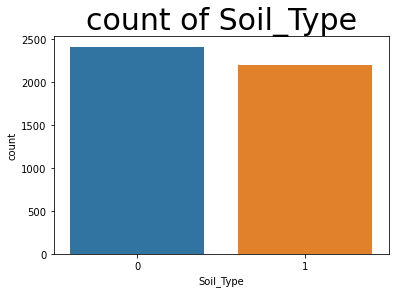

In [82]:
sns.countplot('Soil_Type',data=test_data)
plt.title('count of Soil_Type',fontsize=30)
plt.xlabel('Soil_Type')
plt.ylabel('count')
plt.show()

In [83]:
print(test_data['Soil_Type'].value_counts())

0    2407
1    2192
Name: Soil_Type, dtype: int64


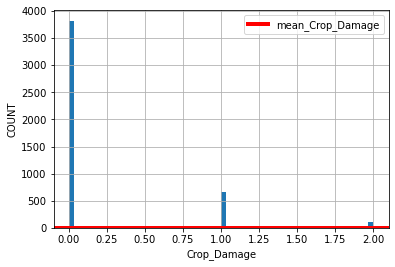

In [84]:
#plotting cost with histogram
COST=test_data['Crop_Damage'].hist(bins=60)
mean_val=np.mean(test_data['Crop_Damage'])
plt.axhline(mean_val,linewidth=4,color='r',label='mean_Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('COUNT')
plt.legend()
plt.show()

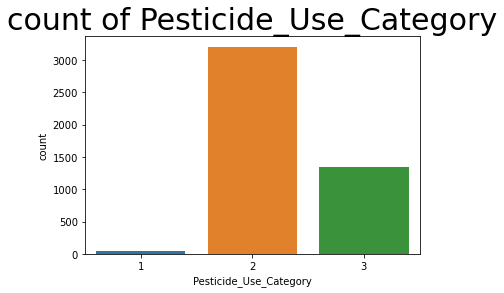

In [85]:
sns.countplot('Pesticide_Use_Category',data=test_data)
plt.title('count of Pesticide_Use_Category',fontsize=30)
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('count')
plt.show()

In [86]:
print(test_data['Pesticide_Use_Category'].value_counts())

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


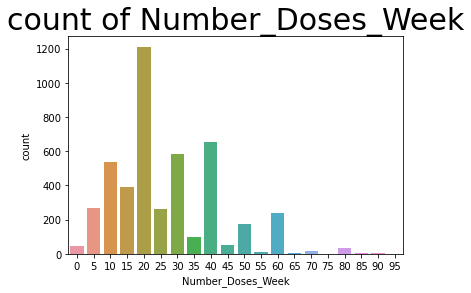

In [87]:
sns.countplot('Number_Doses_Week',data=test_data)
plt.title('count of Number_Doses_Week',fontsize=30)
plt.xlabel('Number_Doses_Week')
plt.ylabel('count')
plt.show()

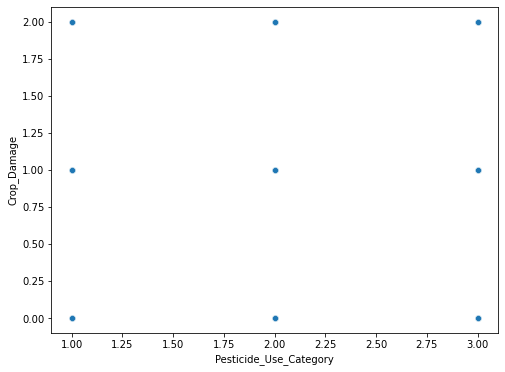

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Pesticide_Use_Category',y='Crop_Damage',data=test_data,palette='GnBu')
plt.show()

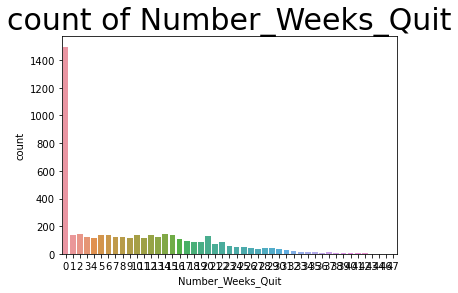

In [89]:
sns.countplot('Number_Weeks_Quit',data=test_data)
plt.title('count of Number_Weeks_Quit',fontsize=30)
plt.xlabel('Number_Weeks_Quit')
plt.ylabel('count')
plt.show()

In [91]:
#dropthecategoricaldata
test_data.drop(['ID'],axis=1,inplace=True)

# Summary statistic

In [95]:
df.describe()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,47.000000,3.000000,2.000000


In [96]:
#checking Correlation
corr=df.corr()

In [97]:
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,-0.032381,-0.003768,-0.018363
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,-0.152918,-0.016196,1.000000


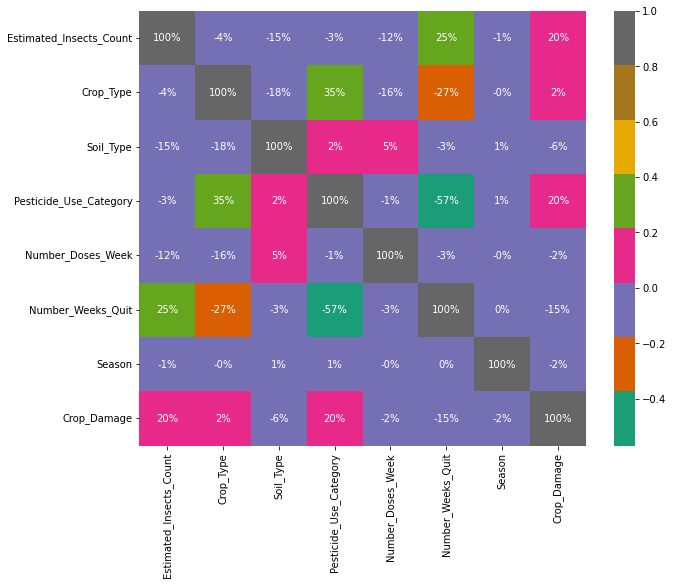

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap='Dark2')
plt.show()

### plotting outlier

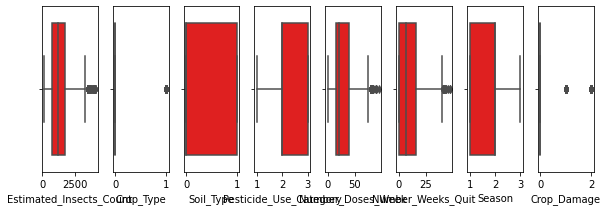

In [100]:
#to plot outlier using box in for
collist=df.columns.values
ncol=9
nrows=25
plt.figure(figsize=(ncol,ncol*8))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="v")
    plt.tight_layout()

### removing outlier


In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
0,1.442868,1.856819,0.954294,2.719788,1.705699,0.947827,1.287027,0.427656
1,1.417081,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
2,1.358138,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
3,1.358138,1.856819,1.047895,2.719788,1.705699,0.947827,0.152078,1.772334
4,1.253760,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
...,...,...,...,...,...,...,...,...
4594,0.951678,0.538556,1.047895,0.600814,0.417285,0.844863,1.287027,1.772334
4595,0.952906,0.538556,1.047895,0.600814,0.226922,0.741900,1.287027,1.772334
4596,1.110086,0.538556,1.047895,0.600814,1.061492,1.832183,0.152078,0.427656
4597,1.110086,0.538556,1.047895,0.600814,1.061492,1.523293,0.152078,0.427656


In [103]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [105]:
train_data=df[(z<3).all(axis=1)]

In [106]:
print(df.shape)
print(train_data.shape)

(4599, 8)
(4376, 8)


In [107]:
#checking the loss of data
percentloss=(4599-4370)/4599*100
print(percentloss)

4.979343335507719


In [108]:
#checking skewness
train_data.skew()

Estimated_Insects_Count    0.794068
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.749111
Number_Doses_Week          0.712831
Number_Weeks_Quit          0.815099
Season                     0.142340
Crop_Damage                1.997716
dtype: float64

In [110]:
#removing skewness using cubic root method
train_data.skew()
for col in train_data.skew().index:
    if col in train_data.describe().columns:
        if train_data[col].skew()>0.55:
            train_data[col]=np.sqrt(train_data[col])
            if train_data[col].skew()<-0.55:
                df[col]=np.cbrt(train_data[col])

In [112]:
#spillting of x and y
x=train_data.drop(columns=["Crop_Damage"],axis=1)
y=train_data["Crop_Damage"]

In [113]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [114]:
#building machine model
#spitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42,stratify=y)



In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3063, 7)
(1313, 7)
(3063,)
(1313,)


In [116]:
#importing all the model library
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#importing boosting library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score


In [117]:
#All algorithm by using loop
model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
      GradientBoostingClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuarcy_Score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("****************************************************************************************")
    print("/n")

Accuarcy_Score of GaussianNB() is
0.8545316070068545
[[1077   43]
 [ 148   45]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1120
         1.0       0.51      0.23      0.32       193

    accuracy                           0.85      1313
   macro avg       0.70      0.60      0.62      1313
weighted avg       0.83      0.85      0.83      1313

****************************************************************************************
/n
Accuarcy_Score of SVC() is
0.8621477532368621
[[1119    1]
 [ 180   13]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1120
         1.0       0.93      0.07      0.13       193

    accuracy                           0.86      1313
   macro avg       0.90      0.53      0.53      1313
weighted avg       0.87      0.86      0.81      1313

****************************************************************************************
/n
Accuarcy_

In [118]:
#cross validation models
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
       GradientBoostingClassifier(),BaggingClassifier()]
for n in models:
    score=cross_val_score(n,x,y,cv=6,scoring="accuracy")
    print("Models:",n)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard Deviation:",score.std())
    print("***********************************************************************************************")
    print("/n")
    
    

Models: GaussianNB()
Score: [0.43287671 0.8739726  0.85322359 0.54595336 0.88340192 0.85322359]
Mean Score: 0.7404419640340493
Standard Deviation: 0.1807989553642143
***********************************************************************************************
/n
Models: SVC()
Score: [0.84794521 0.85342466 0.85322359 0.81344307 0.85322359 0.85322359]
Mean Score: 0.8457472862681724
Standard Deviation: 0.014577497629491424
***********************************************************************************************
/n
Models: DecisionTreeClassifier()
Score: [0.67534247 0.7739726  0.74759945 0.68998628 0.71193416 0.79561043]
Mean Score: 0.7324075639989727
Standard Deviation: 0.043642866024758
***********************************************************************************************
/n
Models: KNeighborsClassifier()
Score: [0.78493151 0.81780822 0.8436214  0.73799726 0.78326475 0.84636488]
Mean Score: 0.8023313352249595
Standard Deviation: 0.038053732208467424
*********************

In [119]:
#using best gridsearchcv to find best parameter in svm
parameters={"kernel" :["linear","rbf","poly"], "C":[1,10], "random_state":[42,60]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'poly', 'random_state': 42}


In [120]:
svc=SVC(kernel="poly",C=1,random_state=42)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8621477532368621
[[1118    2]
 [ 179   14]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1120
         1.0       0.88      0.07      0.13       193

    accuracy                           0.86      1313
   macro avg       0.87      0.54      0.53      1313
weighted avg       0.86      0.86      0.81      1313



Text(0.5, 1.0, 'Support Vector Classification')

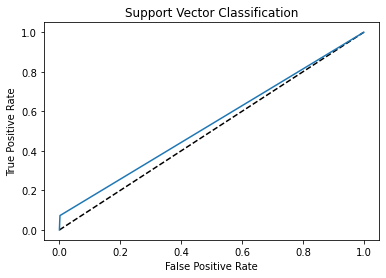

In [121]:
#Applying roc_curve,
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predsvc=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,predsvc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Classification")

# Conclution

In [122]:
train_crop=np.array(y_test)
predicted_crop=np.array(svc.predict(x_test))

In [123]:
Predicted=pd.DataFrame({"train_crop":train_crop,"predicted_crop":predicted_crop},index=range(len(train_crop)))

In [124]:
Predicted

,train_crop,predicted_crop
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1308,0.0,0.0
1309,0.0,0.0
1310,0.0,0.0
1311,0.0,0.0


In [125]:
import pickle

In [134]:
filename='Agriculture.pkl'
pickle.dump(svc,open(filename,'wb'))

# test data

In [127]:
from scipy.stats import zscore
z=np.abs(zscore(test_data))
z

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
0,1.442868,1.856819,0.954294,2.719788,1.705699,0.947827,1.287027,0.427656
1,1.417081,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
2,1.358138,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
3,1.358138,1.856819,1.047895,2.719788,1.705699,0.947827,0.152078,1.772334
4,1.253760,1.856819,0.954294,2.719788,1.705699,0.947827,0.152078,1.772334
...,...,...,...,...,...,...,...,...
4594,0.951678,0.538556,1.047895,0.600814,0.417285,0.844863,1.287027,1.772334
4595,0.952906,0.538556,1.047895,0.600814,0.226922,0.741900,1.287027,1.772334
4596,1.110086,0.538556,1.047895,0.600814,1.061492,1.832183,0.152078,0.427656
4597,1.110086,0.538556,1.047895,0.600814,1.061492,1.523293,0.152078,0.427656


In [128]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [129]:
test=test_data[(z<3).all(axis=1)]

In [130]:
#showing percent loss in test data
percentloss=(1199-1160)/1199*100
print(percentloss)

3.252710592160134


In [131]:
#Removing skewness in test data by sqrt and cbrt method.
test.skew()
for col in test.skew().index:
    if col in test.describe().columns:
        if test[col].skew()>0.55:
            test[col]=np.sqrt(test[col])
        if test[col].skew()<0.55:
            test[col]=np.cbrt(test[col])

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)

In [135]:
#testing the data 
model=pickle.load(open("Agriculture.pkl","rb"))
print(model)

SVC(C=1, kernel='poly', random_state=42)
